<a href="https://colab.research.google.com/github/Vahe0795/Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class DBScan:
    def __init__(self, X, eps=0.2, minpts=4):
        self.X = X
        self.eps = eps
        self.minpts = minpts

    def dbscan(self, X):
        self.labels = [0] * len(X)
        self.C = 0
        for point in range(0, len(X)):
            if not (self.labels[point] == 0):
                continue
            self.neighbor_points = self.find_neighbors(X, point)
            if len(self.neighbor_points) < self.minpts:
                self.labels[point] = -1
            else:
                self.C += 1
                self.create_grow_clusters(X, point)
        return self.labels

    def create_grow_clusters(self, X, point):
        self.labels[point] = self.C
        i = 0
        while i < len(self.neighbor_points):
            next_point = self.neighbor_points[i]
            if self.labels[next_point] == -1:
                self.labels[next_point] = self.C
            elif self.labels[next_point] == 0:
                self.labels[next_point] = self.C
                next_point_neighbor_points = self.find_neighbors(X, next_point)
                if len(next_point_neighbor_points) >= self.minpts:
                    self.neighbor_points += next_point_neighbor_points
            i += 1

    def find_neighbors(self, X, point):
        neighbors = []
        for next_point in range(0, len(X)):
            if np.linalg.norm(X[point] - X[next_point]) < self.eps:
                neighbors.append(next_point)
        return neighbors


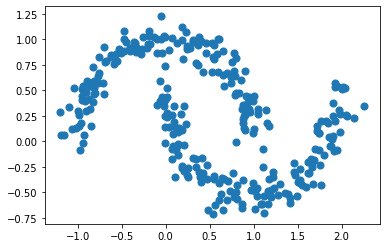

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=300, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

dbscan = DBScan(X, eps=0.18, minpts=7)
label = dbscan.dbscan(X)

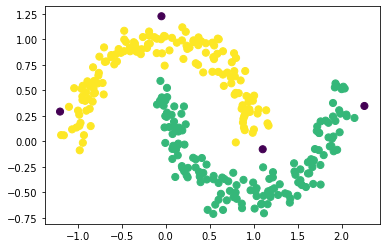

In [3]:
clusters = label
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.show()


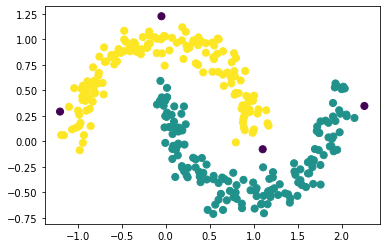

In [4]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=0.18, min_samples=7).fit(X)

clusters = DB.labels_
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.show()